#KNN

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from keras.applications import VGG16
from keras.preprocessing.image import img_to_array, load_img
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_dataset(directory):
    X = []
    y = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            img = load_img(os.path.join(label_dir, filename), target_size=(224, 224))
            img = img_to_array(img)
            X.append(img)
            y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [4]:
X, y = load_dataset('/content/drive/MyDrive/344-331/mini_project/dataset')

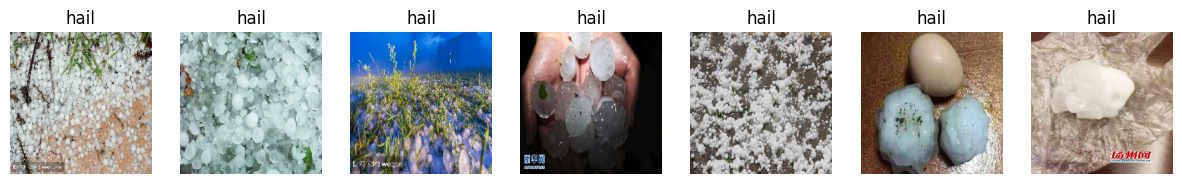

In [5]:
import matplotlib.pyplot as plt

# แสดงรูปภาพจาก dataset
def show_images(images, labels, n=7):
    fig, axes = plt.subplots(1, n, figsize=(15, 3))
    for i in range(n):
        axes[i].imshow(images[i].astype(np.uint8))
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# แสดงรูปภาพ
show_images(X, y)

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

##Split data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## feature extraction

In [8]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
X_train_features = base_model.predict(X_train)
X_test_features = base_model.predict(X_test)

27/27 [==============================] - 448s 17s/step


In [9]:
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

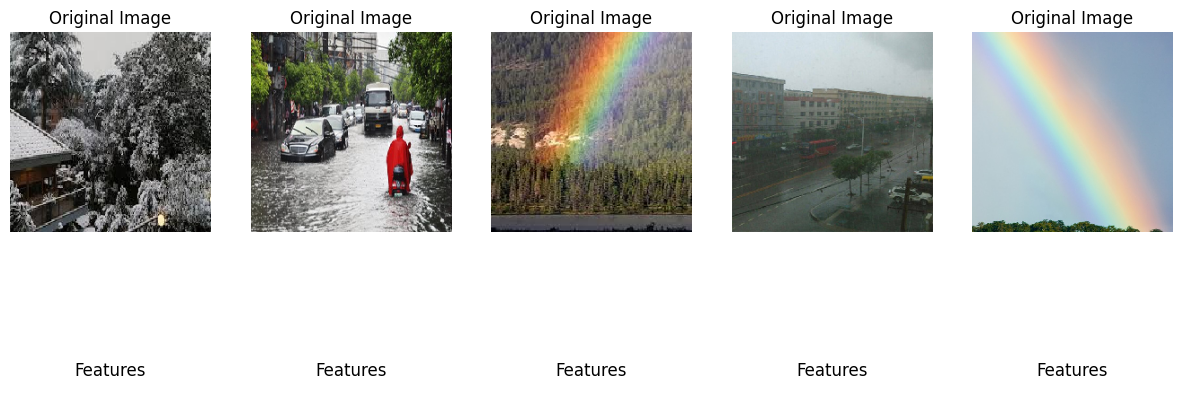

In [10]:
# แสดงรูปภาพที่ใช้ในการ Feature extraction
def show_images_with_features(images, features, n=5):
    fig, axes = plt.subplots(2, n, figsize=(15, 6))
    for i in range(n):
        axes[0, i].imshow(images[i].astype(np.uint8))
        axes[0, i].set_title('Original Image')
        axes[0, i].axis('off')
        if features[i].ndim == 1:  # ตรวจสอบขนาดของฟีเจอร์
            axes[1, i].imshow(features[i].reshape(1, -1), cmap='gray')  # reshape features ใหม่
        else:
            axes[1, i].imshow(features[i], cmap='gray')
        axes[1, i].set_title('Features')
        axes[1, i].axis('off')
    plt.show()

# แสดงรูปภาพที่ใช้ในการ Feature extraction
show_images_with_features(X_test, X_test_features)

##Model

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_features, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn.predict(X_test_features)
print(y_pred)

[8 8 8 8 6 8 8 3 4 8 3 8 8 3 8 3 3 8 8 7 8 5 8 8 8 8 8 4 8 8 8 7 8 8 8 8 8
 3 8 8 8 6 8 8 8 8 8 8 6 8 7 3 8 3 8 8 3 7 8 7 8 8 8 8 8 8 8 8 8 3 8 3 8 3
 8 8 3 8 3 8 8 7 4 8 8 8 4 3 3 8 8 8 8 4 8 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 7
 4 8 7 8 8 3 8 8 4 3 8 8 8 8 8 7 8 8 4 8 8 4 8 7 8 8 8 3 7 7 3 8 7 8 8 8 8
 3 8 8 8 3 8 7 7 6 8 8 4 8 3 8 8 8 3 8 8 3 5 8 8 5 8 7 7 8 8 5 8 6 6 8 8 7
 8 8 8 8 8 8 8 8 6 8 8 8 8 8 8 7 8 8 4 3 8 8 8 8 4 8 8 8 4 4 8 8 8 8 8 8 8
 8 8 8 5 8 8 7 3 3 3 7 8 8 8 8 8 8 8 8 8 8 8 8 8 3 8 8 8 8 8 8 8 3 8 8 8 8
 8 8 8 8 8 8 3 8 8 8 7 8 8 8 7 8 8 8 8 5 7 8 8 8 3 6 8 8 7 8 8 4 7 8 3 3 7
 7 3 8 8 8 3 8 8 8 6 8 3 4 6 8 8 3 3 8 8 3 8 4 8 6 8 7 8 6 8 3 8 6 8 7 8 3
 8 8 8 5 8 8 6 7 4 7 8 8 8 3 8 8 7 4 8 8 8 8 8 3 4 8 7 8 6 8 7 7 8 7 4 4 8
 8 8 8 8 3 4 8 8 8 3 7 4 5 7 8 3 8 8 3 3 8 8 8 8 8 8 8 8 8 9 7 8 5 8 4 8 7
 8 8 4 3 8 8 8 8 9 8 4 8 8 8 8 4 8 8 8 3 8 8 8 8 8 8 8 3 8 8 8 5 8 8 6 7 6
 8 8 6 8 4 7 8 8 3 8 8 3 8 3 8 8 8 8 4 3 8 8 8 7 8 8 7 4 7 8 8 8 4 8 8 7 8
 3 3 8 3 6 3 7 8 8 3 3 6 

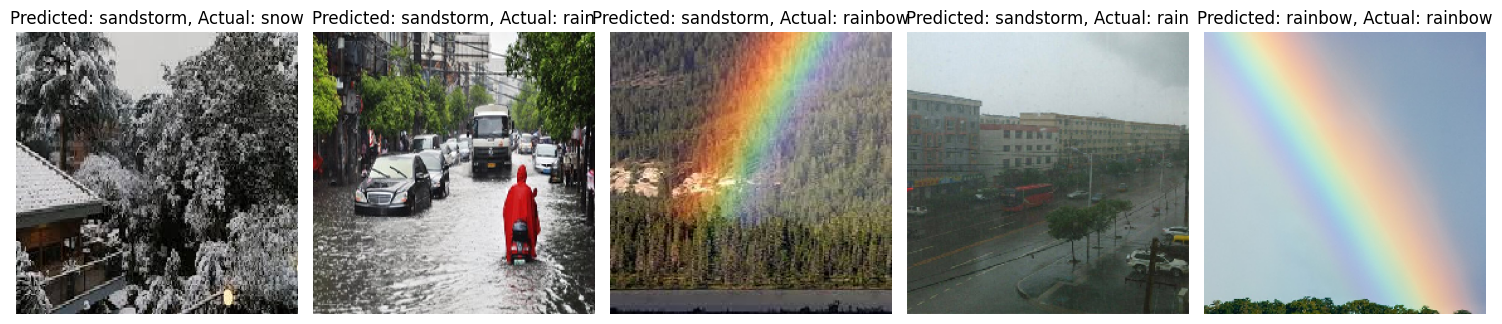

In [18]:
# ทำนายภาพจากชุดข้อมูลทดสอบ
y_pred = knn.predict(X_test_features)

# เลือกจำนวนรูปภาพที่ต้องการทำนายและแสดงผล
num_images_to_predict = 5

# ทำนายและแสดงรูปภาพ
fig, axes = plt.subplots(1, num_images_to_predict, figsize=(15, 6))
for i in range(num_images_to_predict):
    # เลือกรูปภาพที่ต้องการทำนาย
    index_to_predict = i

    # ทำนายภาพ
    predicted_label = label_encoder.inverse_transform([y_pred[index_to_predict]])[0]
    actual_label = label_encoder.inverse_transform([y_test[index_to_predict]])[0]

    # แสดงรูปภาพที่ทำนายได้
    axes[i].imshow(X_test[index_to_predict].astype(np.uint8))
    axes[i].set_title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

##Evaluation

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       1.00      0.17      0.29         6
           3       0.77      0.62      0.68       130
           4       0.88      0.73      0.80        59
           5       0.80      0.16      0.26       103
           6       0.92      0.55      0.69        42
           7       0.87      0.35      0.49       214
           8       0.25      0.99      0.40       140
           9       1.00      0.02      0.04       139

    accuracy                           0.45       836
   macro avg       0.65      0.36      0.37       836
weighted avg       0.76      0.45      0.43       836



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


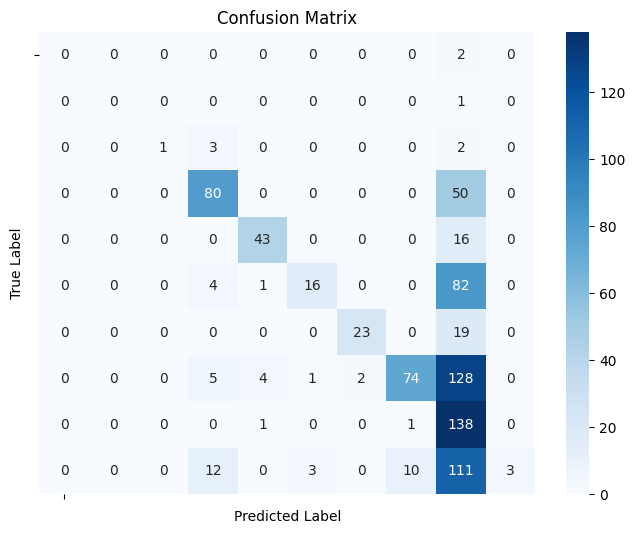

In [20]:
# สร้าง confusion matrix
cm = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix ด้วย heatmap
plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[''], yticklabels=[''])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import pickle
model = "knn_model.pickle"
pickle.dump(model, open(model , "wb"))
loaded_model = pickle.load(open( model, "rb"))

อธิบายเเละวิเคราะห์ผลการประเมินประสิทธิภาพของKNNเเละCNN
-CNN มักมีประสิทธิภาพที่ดีในการจัดการกับข้อมูลที่มีโครงสร้างซับซ้อน
-KNN มักจะให้ประสิทธิภาพที่ดีในข้อมูลที่มีลักษณะเหมือนกัน หรือมีโครงสร้างคล้ายกัน เช่นการทำนายภาพของอากาศในพื้นที่ที่มีลักษณะอากาศเดียวกัน แต่อาจมีประสิทธิภาพที่ต่ำในข้อมูลที่มีการแยกแยะลักษณะอย่างชัดเจน